In [1]:
def convert_one_currency_to_usd(currency):
    import requests
    from bs4 import BeautifulSoup

    url = f'https://www.xe.com/currencyconverter/convert/?Amount=1&From={currency}&To=USD'  # URL for the currency conversion page
    headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3'}  # User agent to avoid getting blocked by the server

    response = requests.get(url, headers=headers)
    soup = BeautifulSoup(response.content, 'html.parser')

    table = soup.find('div',attrs={"class":"unit-rates___StyledDiv-sc-1dk593y-0 dEqdnx"}).find('p').text

    import re

    number_regex = r'[0-9.]+'

    # Use regular expressions to extract the numbers from the equation string
    numbers = re.findall(number_regex, table)

    # Extract the second number from the list of numbers
    second_number = float(numbers[1])
    currency2USD = 1/second_number

    #print(f"The current exchange rate for 1 {currency} to USD is {second_number}, and invertion {currency2USD}")
    
    return currency2USD

def convert_one_currency_to_cny(currency):
    import requests
    from bs4 import BeautifulSoup

    url = f'https://www.xe.com/currencyconverter/convert/?Amount=1&From={currency}&To=CNY'  # URL for the currency conversion page
    headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3'}  # User agent to avoid getting blocked by the server

    response = requests.get(url, headers=headers)
    soup = BeautifulSoup(response.content, 'html.parser')

    table = soup.find('div',attrs={"class":"unit-rates___StyledDiv-sc-1dk593y-0 dEqdnx"}).find('p').text

    import re

    number_regex = r'[0-9.]+'

    # Use regular expressions to extract the numbers from the equation string
    numbers = re.findall(number_regex, table)

    # Extract the second number from the list of numbers
    second_number = float(numbers[1])
    currency2CNY = 1/second_number

    #print(f"The current exchange rate for 1 {currency} to USD is {second_number}, and invertion {currency2USD}")
    
    return currency2CNY


In [4]:
# Get Prada Prices
def get_prada_global_prices(product_code, product_code_eu, product_code_jp, product_name):
    import requests
    from bs4 import BeautifulSoup
    loc_list = ['US', 'CA','JP', 'FR', 'UK', 'IT', 'HK', 'CN']
    url_list = [f'https://www.prada.com/us/en/products.{product_name}.{product_code}..html',
                f'https://www.prada.com/ca/en/products.{product_name}.{product_code}..html',
                f'https://www.prada.com/jp/ja/products.{product_name}.{product_code_jp}..html',
                f'https://www.prada.com/fr/fr/products.{product_name}.{product_code_eu}..html',
                f'https://www.prada.com/gb/en/products.{product_name}.{product_code_eu}..html',
                f'https://www.prada.com/it/it/products.{product_name}.{product_code_eu}..html',
                f'https://www.prada.com/hk/hk/products.{product_name}.{product_code_jp}..html',
                f'https://www.prada.com/cn/zh/products.{product_name}.{product_code}..html']
    cur_list = ['USD', 'CAD', 'JPY', 'EUR', 'GBP', 'EUR', 'HKD', 'CNY']

    loc_url_cur = list(zip(loc_list, url_list, cur_list))
    prices_loc = []
    prices_usd = []
    for loc, url, currency in loc_url_cur:
        headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3'}
        response = requests.get(url, headers=headers)
        soup = BeautifulSoup(response.text, 'html.parser')
        price_string = soup.find("div", class_='info-card-component__basic-info-price').text.strip()
        import re
        # Define regular expressions to match the currency and number in the price string
        # currency_regex = r'([^\d.,]+)'
        number_regex = r'([\d.,]+)'
        # Use the regular expressions to extract the currency and number from the price string
        # currency = re.search(currency_regex, price_string).group(1)    
        number = re.search(number_regex, price_string).group(1)
        # Remove any commas from the number string and convert it to a float
        number = round(float(number.replace(',', '').replace('.','')))
        number_usd = round(number * convert_one_currency_to_usd(currency))
        # Print the extracted currency and number
        #print(f'The price of the bag in {loc} is {currency} {number} or USD {number_usd}')
        prices_loc.append(number)
        prices_usd.append(number_usd)
    
    import pandas as pd
    All_prices = pd.DataFrame(list(zip(loc_list, prices_loc, prices_usd)), columns = ['Location', 'LocalCurrency','USD'])
    USD_prices = pd.DataFrame(list(zip(loc_list, prices_usd)), columns = ['Location', 'USD'])
    import matplotlib.pyplot as plt
    df = USD_prices.sort_values(by=['USD'], ascending = False)
    print(All_prices)
    plt.barh(y=df.Location, width=df.USD, color='#d3d3ea')
    plt.title(f"{product_name}\n Global Prices 全球比价美金", fontproperties=font)
    plt.xlabel('Price in USD', fontsize=12)
    plt.ylabel('Location', fontsize=12)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    plt.grid(axis='x', linestyle='--', alpha=0.7)
    for i, value in enumerate(df.USD):
        plt.text(value, i, str(value))
  
    return list(zip(loc_list, prices_usd))

In [5]:
product_code = '1BA439_2CYR_F0002_V_OOO'#'1BH204_2AWL_F0934_V_V9L'
product_code_eu = product_code
product_code_jp = product_code
product_name = 'Prada Re-Edition 2005 仿水晶装饰缎面手袋'
test = get_prada_global_prices(product_code, product_code_eu, product_code_jp, product_name)


AttributeError: 'NoneType' object has no attribute 'find'

In [7]:
    product_code = '1BA863_NZV_F0002_V_EOO'
    product_code_eu = product_code
    product_code_jp = '1BA863_NZV_F0002_V_OOO'
    product_name = 'Prada Galleria 中号Saffiano 皮革手袋'
    import requests
    from bs4 import BeautifulSoup
    loc_list = ['US', 'CA','JP', 'FR', 'UK', 'IT', 'HK', 'CN']
    url_list = [f'https://www.prada.com/us/en/products.{product_name}.{product_code}..html',
                f'https://www.prada.com/ca/en/products.{product_name}.{product_code}..html',
                f'https://www.prada.com/jp/ja/products.{product_name}.{product_code_jp}..html',
                f'https://www.prada.com/fr/fr/products.{product_name}.{product_code_eu}..html',
                f'https://www.prada.com/gb/en/products.{product_name}.{product_code_eu}..html',
                f'https://www.prada.com/it/it/products.{product_name}.{product_code_eu}..html',
                f'https://www.prada.com/hk/hk/products.{product_name}.{product_code_jp}..html',
                f'https://www.prada.com/cn/zh/products.{product_name}.{product_code}..html']
    cur_list = ['USD', 'CAD', 'JPY', 'EUR', 'GBP', 'EUR', 'HKD', 'CNY']

    loc_url_cur = list(zip(loc_list, url_list, cur_list))
    prices_loc = []
    prices_usd = []

In [8]:
    for loc, url, currency in loc_url_cur:
        headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3'}
        response = requests.get(url, headers=headers)
        soup = BeautifulSoup(response.text, 'html.parser')
        price_string = soup.find("div", class_='info-card-component__basic-info-price').text.strip()
        import re
        # Define regular expressions to match the currency and number in the price string
        # currency_regex = r'([^\d.,]+)'
        number_regex = r'([\d.,]+)'
        # Use the regular expressions to extract the currency and number from the price string
        # currency = re.search(currency_regex, price_string).group(1)    
        number = re.search(number_regex, price_string).group(1)
        # Remove any commas from the number string and convert it to a float
        number = round(float(number.replace(',', '').replace('.','')))
        number_usd = round(number * convert_one_currency_to_usd(currency))
        # Print the extracted currency and number
        #print(f'The price of the bag in {loc} is {currency} {number} or USD {number_usd}')
        prices_loc.append(number)
        prices_usd.append(number_usd)

AttributeError: 'NoneType' object has no attribute 'find'

  Location  LocalCurrency   USD
0       US           4300  4300
1       CA           5200  3776
2       JP         528000  4004
3       FR           3300  3505
4       UK           3300  4023
5       IT           3300  3505
6       HK          33900  4318
7       CN          31500  4574


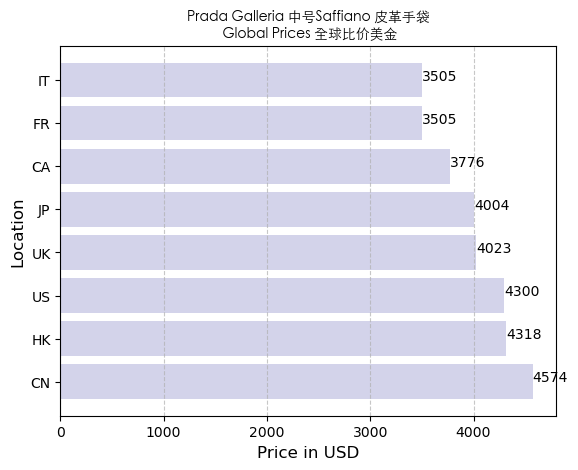

In [127]:
product_code = '1BA863_NZV_F0002_V_EOO'
product_code_eu = product_code
product_code_jp = '1BA863_NZV_F0002_V_OOO'
product_name = 'Prada Galleria 中号Saffiano 皮革手袋'
test = get_prada_global_prices(product_code, product_code_eu, product_code_jp, product_name)

In [130]:
# Get Chanel Prices
def get_chanel_global_prices(product_code, product_name):
    import requests
    from bs4 import BeautifulSoup
    loc_list = ['HK', 'US', 'MX', 'CA-EN', 'CA-FR', 'FR', 'IT', 'UK']
    url_list = [f'https://www.chanel.com/hk-zh/fashion/p/{product_code}/',
            f'https://www.chanel.com/us/fashion/p/{product_code}/',
            f'https://www.chanel.com/mx/moda/p/{product_code}',
            f'https://www.chanel.com/ca-en/fashion/p/{product_code}/',
            f'https://www.chanel.com/ca-fr/mode/fashion/p/{product_code}/',
            f'https://www.chanel.com/fr/mode/p/{product_code}/',
            f'https://www.chanel.com/it/mode/p/{product_code}/',
            f'https://www.chanel.com/gb/fashion/p/{product_code}/']
    #url = f'https://www.chanel.com/zh_CN/fashion/p/hdb/{product_code}/'
    cur_list = ['HKD', 'USD', 'MXN', 'CAD', 'CAD', 'EUR', 'EUR', 'GBP']

    loc_url_cur = list(zip(loc_list, url_list, cur_list))
    prices_loc = []
    prices_usd = []
    prices_cny = []
    for loc, url, currency in loc_url_cur:
        
        headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3'}
        response = requests.get(url, headers=headers)
        soup = BeautifulSoup(response.text, 'html.parser')
        table = soup.find('div', class_='product-details__price-block').text.strip()
        if any(char.isdigit() for char in table):
            import re
            if loc != 'CA-FR':
                num_str = re.sub('[^0-9.]', '', table)
                num = float(num_str)
            else:
                num_str = re.sub(',','.',table)
                num_str = re.sub('[^0-9.]', '', num_str) 
                num = float(num_str)
            # Remove any commas from the number string and convert it to a float
            number_usd = round(num * convert_one_currency_to_usd(currency))
            number_cny = round(num * convert_one_currency_to_cny(currency))
        else:
            num, number_usd, number_cny = 0, 0, 0
        # Print the extracted currency and number
        #print(f'The price of the bag in {loc} is {currency} {number} or USD {number_usd}')
        prices_loc.append(num)
        prices_usd.append(number_usd)
        prices_cny.append(number_cny)
    
    import pandas as pd
    All_prices = pd.DataFrame(list(zip(loc_list, prices_loc, prices_usd, prices_cny)), columns = ['Location', 'LocalCurrency','USD', 'CNY'])
    
    USD_prices = pd.DataFrame(list(zip(loc_list, prices_usd)), columns = ['Location', 'USD'])
    import matplotlib.pyplot as plt
    df = USD_prices.sort_values(by=['USD'], ascending = False)
    print(All_prices)
    
    plt.barh(y=df.Location, width=df.USD, color='#d3d3ea')
    plt.title(f"{product_name}\n Global Prices 全球比价美金", fontproperties=font)
    plt.xlabel('Price in USD', fontsize=12)
    plt.ylabel('Location', fontsize=12)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    plt.grid(axis='x', linestyle='--', alpha=0.7)

    for i, value in enumerate(df.USD):
        plt.text(value, i, str(value), fontsize=10)

    plt.show()
    
    return list(zip(loc_list, prices_usd))



  Location  LocalCurrency    USD    CNY
0       HK        75200.0   9580  65975
1       US         9600.0   9600  66142
2       MX       200870.0  10621  73249
3    CA-EN        12275.0   8914  61592
4    CA-FR        12275.0   8914  61592
5       FR         9300.0   9877  68331
6       IT         9300.0   9877  68331
7       UK         8180.0   9972  68609


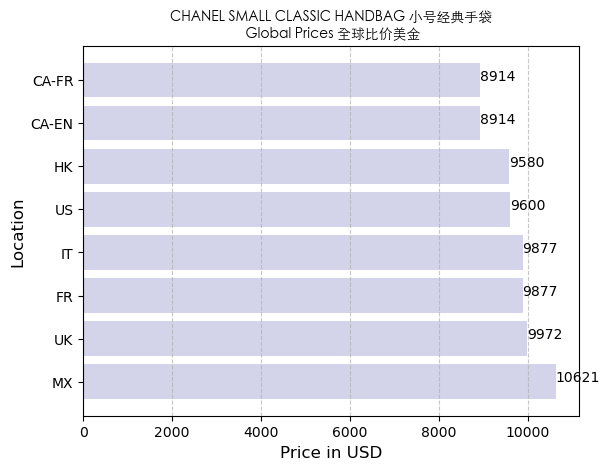

In [133]:
product_code = 'A01113Y01864C3906'
product_name = 'CHANEL SMALL CLASSIC HANDBAG 小号经典手袋'
test = get_chanel_global_prices(product_code, product_name)

  Location  LocalCurrency    USD    CNY
0       HK        78500.0  10000  68870
1       US        10200.0  10200  70276
2       MX       209510.0  11078  76400
3    CA-EN        12800.0   9295  64226
4    CA-FR        12800.0   9295  64226
5       FR         9700.0  10302  71270
6       IT         9700.0  10302  71270
7       UK         8530.0  10398  71545


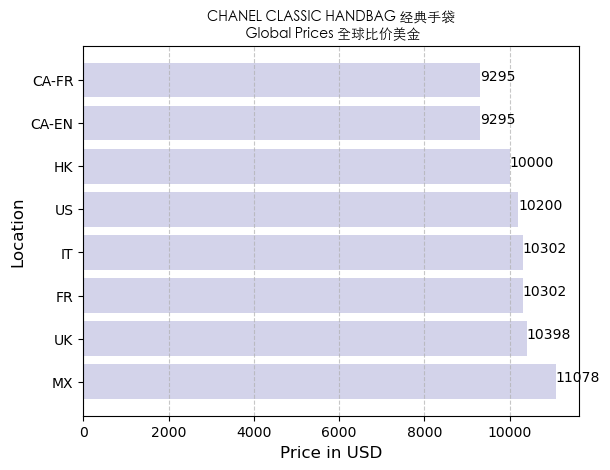

In [134]:
product_code = 'A01112Y0129594305'
product_name = 'CHANEL CLASSIC HANDBAG 经典手袋'
test = get_chanel_global_prices(product_code, product_name)

In [8]:
# Get Tory Purch Prices
product_code = '75003'
product_name = 'ELEANOR BAG'


In [9]:
url = f'https://www.toryburch.com/en-us/handbags/shoulder-bags/eleanor-bag/{product_code}/'

In [10]:
    import requests
    from bs4 import BeautifulSoup

In [19]:
        headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3'}
        response = requests.get(url, headers=headers)
        soup = BeautifulSoup(response.text, 'html.parser')
        table = soup.find('span', class_='contentinfo')

In [20]:
print(table)

None


In [21]:
import requests
from bs4 import BeautifulSoup

headers = {"User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3"}

response = requests.get(url, headers=headers)
soup = BeautifulSoup(response.text, 'html.parser')

# Update the 'class_name' variable with the correct class name for the 'span' element
class_name = "price-item-tNM"
price_element = soup.find('span', class_=class_name)

if price_element is not None:
    price = price_element.text.strip()
    print(price)
else:
    print("Element not found")


Element not found


In [22]:
pip install selenium


Note: you may need to restart the kernel to use updated packages.


In [1]:
pwd

'/Users/biyuanzhang'

In [6]:
from bs4 import BeautifulSoup
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
product_code = '75003'
url = "your_url_here"  # Replace with the correct URL
url = f'https://www.toryburch.com/en-us/handbags/shoulder-bags/eleanor-bag/{product_code}/'
# Update the 'webdriver_path' variable with the path to your downloaded WebDriver executable
webdriver_path = "/Users/biyuanzhang"

options = webdriver.ChromeOptions()
options.headless = True

driver = webdriver.Chrome(executable_path=webdriver_path, options=options)
driver.get(url)

try:
    # Update the 'class_name' variable with the correct class name for the 'span' element
    class_name = "price-item-tNM"
    price_element = WebDriverWait(driver, 10).until(
        EC.presence_of_element_located((By.CLASS_NAME, class_name))
    )

    soup = BeautifulSoup(driver.page_source, 'html.parser')
    price_span = soup.find('span', class_=class_name)

    if price_span is not None:
        price = price_span.text.strip()
        print(price)
    else:
        print("Element not found")

finally:
    driver.quit()


/var/folders/9d/84xwzy7j3_vff39p32_x5xxh0000gn/T/ipykernel_38461/2577572182.py:13: DeprecationWarning: headless property is deprecated, instead use add_argument('--headless') or add_argument('--headless=new')
  options.headless = True
/var/folders/9d/84xwzy7j3_vff39p32_x5xxh0000gn/T/ipykernel_38461/2577572182.py:15: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(executable_path=webdriver_path, options=options)


AttributeError: 'Service' object has no attribute 'process'

In [8]:
from bs4 import BeautifulSoup
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
product_code = '75003'
url = f'https://www.toryburch.com/en-us/handbags/shoulder-bags/eleanor-bag/{product_code}/'
# Update the 'webdriver_path' variable with the path to your downloaded WebDriver executable
webdriver_path = "/Users/biyuanzhang"

options = webdriver.ChromeOptions()
options.add_argument('--headless')

service = Service(executable_path=webdriver_path)
driver = webdriver.Chrome(service=service, options=options)
driver.get(url)

try:
    # Update the 'class_name' variable with the correct class name for the 'span' element
    class_name = "price-item-tNM"
    price_element = WebDriverWait(driver, 10).until(
        EC.presence_of_element_located((By.CLASS_NAME, class_name))
    )

    soup = BeautifulSoup(driver.page_source, 'html.parser')
    price_span = soup.find('span', class_=class_name)

    if price_span is not None:
        price = price_span.text.strip()
        print(price)
    else:
        print("Element not found")

finally:
    driver.quit()


AttributeError: 'Service' object has no attribute 'process'